# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Diaz Islami
- **Email:** islamidiaz16@gmail.com
- **ID Dicoding:** diaz_islami

## Menentukan Pertanyaan Bisnis

1. Pada hari apa jumlah penyewaan terbanyak dan terendah terjadi untuk seluruh serta masing - masing jenis pengguna?
2. Pada bulan apa peminjaman terbanyak dan terendah terjadi untuk semua dan masing - masing jenis pengguna?
3. Berapa banyak jumlah peningkatan peminjaman sepeda jika terjadi peningkatan dalam 1 tahun terakhir? Jika tidak, berapa perbandingan jumlah peminjaman dari setiap tahun?
4. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
5. Musim apa yang paling mempengaruhi jumlah peminjaman sepeda (terbanyak dan terendah)?
6. Bagaimana variabel suhu, kelembapan, dan kecepatan angin mempengaruhi jumlah penyewaan sepeda?
7. Bagaimana performa peminjaman sepeda setiap jam pada hari tertentu dengan kondisi cuaca tertentu (seperti cuaca, musim, atau hari libur/bukan)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Dataset yang digunakan dalam projek ini adalah dataset **Bike Sharing** yang terdiri dari 2 dataset dengan masing-masing memiliki format **csv** yang diantaranya **hour.csv** dan **day.csv**. Dataset diperoleh dengan cara mengunduhnya langsung melalui [tautan berikut](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)

### Gathering Data

In [2]:
day_df = pd.read_csv("/content/day.csv")
hour_df = pd.read_csv("/content/hour.csv")

In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10731,10732,2012-03-28,2,1,3,6,0,3,1,1,0.36,0.3333,0.46,0.3582,4,111,115
16615,16616,2012-11-30,4,1,11,2,0,5,1,1,0.24,0.2879,0.75,0.0000,2,10,12
12518,12519,2012-06-10,2,1,6,19,0,0,0,1,0.82,0.7121,0.28,0.2836,115,260,375
17328,17329,2012-12-29,1,1,12,21,0,6,0,2,0.28,0.2424,0.56,0.4925,4,56,60
11009,11010,2012-04-08,2,1,4,21,0,0,0,1,0.52,0.5000,0.34,0.2239,53,77,130


In [5]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
517,518,2012-06-01,2,1,6,0,5,1,2,0.654167,0.607962,0.755417,0.237563,533,3594,4127
530,531,2012-06-14,2,1,6,0,4,1,1,0.648333,0.624383,0.569583,0.253733,1180,6183,7363
371,372,2012-01-07,1,1,1,0,6,0,1,0.393333,0.390779,0.531667,0.174758,1070,3451,4521
468,469,2012-04-13,2,1,4,0,5,1,1,0.442500,0.431808,0.408333,0.155471,1252,5146,6398
460,461,2012-04-05,2,1,4,0,4,1,1,0.435000,0.431163,0.374167,0.219529,1192,5265,6457


In [7]:
print(f"Dimensi data dari hour_df: ", hour_df.shape)
print(f"Dimensi data dari day_df: ", day_df.shape)

Dimensi data dari hour_df:  (17379, 17)
Dimensi data dari day_df:  (731, 16)


**Insight:**

Baik **hour.csv** dan **day.csv** memiliki fitur-fitur berikut, kecuali **hr** yang tidak tersedia dalam **day.csv**:

- **instant**: indeks catatan
- **dteday**: tanggal
- **season**: musim (1: semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
- **yr**: tahun (0: 2011, 1: 2012)
- **mnth**: bulan (1 hingga 12)
- **hr**: jam (0 hingga 23)
- **holiday**: apakah hari itu libur atau tidak (diekskstrak dari [Jadwal Libur](http://dchr.dc.gov/page/holiday-schedule))
- **weekday**: hari dalam minggu
- **workingday**: jika hari bukan akhir pekan atau libur, nilainya 1, jika tidak, 0
- **weathersit**:
  - 1: Cerah, sedikit awan, berawan sebagian
  - 2: Kabut + Berawan, Kabut + Awan Terputus, Kabut + Sedikit Awan, Kabut
  - 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
  - 4: Hujan Lebat + Es + Badai Petir + Kabut, Salju + Kabut
- **temp**: Suhu yang dinormalisasi dalam Celsius. Nilai dibagi 41 (maksimum)
- **atemp**: Suhu yang dirasakan dinormalisasi dalam Celsius. Nilai dibagi 50 (maksimum)
- **hum**: Kelembapan yang dinormalisasi. Nilai dibagi 100 (maksimum)
- **windspeed**: Kecepatan angin yang dinormalisasi. Nilai dibagi 67 (maksimum)
- **casual**: jumlah pengguna kasual
- **registered**: jumlah pengguna terdaftar
- **cnt**: jumlah total sepeda yang disewa termasuk pengguna kasual dan terdaftar

### Assessing Data

#### Assessing Data hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum().rename("Jumlah Missing Value")

,Jumlah Missing Value
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print(f"Jumlah data duplikat dalam hour_df: ", hour_df.duplicated().sum())

Jumlah data duplikat dalam hour_df:  0


In [11]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [12]:
hour_df[hour_df.casual >= 150]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1772,1773,2011-03-19,1,0,3,13,0,6,0,1,0.50,0.4848,0.34,0.4627,174,127,301
1773,1774,2011-03-19,1,0,3,14,0,6,0,1,0.50,0.4848,0.31,0.4925,168,144,312
1774,1775,2011-03-19,1,0,3,15,0,6,0,1,0.50,0.4848,0.29,0.4179,170,143,313
1775,1776,2011-03-19,1,0,3,16,0,6,0,1,0.50,0.4848,0.31,0.3881,175,129,304
1798,1799,2011-03-20,1,0,3,15,0,0,0,1,0.40,0.4091,0.32,0.0896,172,136,308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16460,16461,2012-11-23,4,1,11,14,0,5,1,1,0.50,0.4848,0.36,0.2537,240,195,435
16461,16462,2012-11-23,4,1,11,15,0,5,1,1,0.48,0.4697,0.41,0.2537,233,214,447
16462,16463,2012-11-23,4,1,11,16,0,5,1,2,0.48,0.4697,0.41,0.1045,158,199,357
16819,16820,2012-12-08,4,1,12,14,0,6,0,2,0.40,0.4091,0.87,0.2836,164,378,542


**Insight dari hour_df:**
- Terdapat kesalahan berupa invalid data pada kolom **dteday**: kesalahan tipe data yang seharusnya bertipe *datetime* malah bertipe *object*. Sehingga perlu diubah tipe datanya.
- Pada kolom **windspeed**, **casual**, dan **registered** memiliki nilai yang telah dinormalisasi yang mana nilai pada kolom - kolom tersebut perlu dikonversi pada nilai semula (apa adanya dalam satuan yang ditetapkan dalam penjelasan dataset) dengan tujuan untuk memudahkan analisis data terhadap kolom - kolom tersebut.
- Pada kolom **windspeed**, **casual**, **registered**, dan **cnt** memiliki sebaran data yang tidak sempit yang mana dinilai melalui parameter statistik standard deviation yang dimiliki. Melihat data pada kolom-kolom tersebut, perbedaan nilai pada data begitu timpang namun nilai dari data tersebut benar adanya. Sehingga apabila ingin dilakukan pelatihan pada tahap modelling, maka data pada kolom tersebut perlu dinormalisasi atau distandarisasi; khususnya data pada kolom **casual**, **registered**, dan **cnt**.
- Jika melihat karakteristik data, diketahui bahwa beberapa fitur memiliki nilai data yang bertipe data numerik yang mana sebenarnya merupakan nilai yang bertipe data kategorik. Data kategorik tersebut diubah menjadi data numerik untuk memudahkan dalam melakukan proses training/pelatihan dalam tahap modelling. Karena, pada proses ini hanya dibatasi pada proses analisis data, maka data numerik tersebut perlu diubah kembali ke dalam data kategorik dengan menyesuaikan nilai kategori yang merepresentasikan nilai - nilai angka dalam fitur/kolom yang diantaranya **season**, **mnth**, **holiday** dan **workingday**.
- Pada kolom **dteday**, **yr**, **mnth**, **hr**, **hum**, dan **cnt** perlu diubah kembali namanya menjadi lebih spesifik guna mengetahui dan menjelaskan detail terkait data pada fitur - fitur tersebut.

#### Assessing Data day_df

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [14]:
day_df.isna().sum().rename("Jumlah Missing Value")

,Jumlah Missing Value
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [15]:
print(f"Jumlah data duplikat dari day_df: ", day_df.duplicated().sum())

Jumlah data duplikat dari day_df:  0


In [16]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight dari day_df:**
- Terdapat kesalahan berupa invalid data pada kolom **dteday**: kesalahan tipe data yang seharusnya bertipe *datetime* malah bertipe *object*. Sehingga perlu diubah tipe datanya.
- Pada kolom **windspeed**, **casual**, dan **registered*** memiliki nilai yang telah dinormalisasi yang mana nilai pada kolom - kolom tersebut perlu dikonversi pada nilai semula (apa adanya dalam satuan yang ditetapkan dalam penjelasan dataset) dengan tujuan untuk memudahkan analisis data terhadap kolom - kolom tersebut.
- Jika melihat karakteristik data, diketahui bahwa beberapa fitur memiliki nilai data yang bertipe data numerik yang mana sebenarnya merupakan nilai yang bertipe data kategorik. Data kategorik tersebut diubah menjadi data numerik untuk memudahkan dalam melakukan proses training/pelatihan dalam tahap modelling. Karena, pada proses ini hanya dibatasi pada proses analisis data, maka data numerik tersebut perlu diubah kembali ke dalam data kategorik dengan menyesuaikan nilai kategori yang merepresentasikan nilai - nilai angka dalam fitur/kolom yang diantaranya **season**, **mnth**, **holiday** dan **workingday**.
- Pada kolom **dteday**, **yr**, **mnth**, **hr**, **hum**, dan **cnt** perlu diubah kembali namanya menjadi lebih spesifik guna mengetahui dan menjelaskan detail terkait data pada fitur - fitur tersebut.

### Cleaning Data

#### Cleaning Data hour_df

Langkah awal dari cleaning data ini adalah mengubah kembali nama dari kolom **dteday**, **yr**, **mnth**, **hr**, **hum**, dan **cnt**.

In [17]:
hour_df.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "hum": "humidity",
    "cnt": "count"
}, inplace=True)

Selanjutnya adalah mengubah representasi nilai numerik pada kolom **season**, **year**, **month**, **holiday**, **weekday**, **workingday**, dan **weathersit** menjadi nilai kategori sesuai representasi dalam penjelasan dataset.

In [18]:
year = {
    0: "2011",
    1: "2012"}

month = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"}

season = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"}

weathersit = {
    1: "Clear/Partly Cloudy",
    2: "Misty/Cloudy",
    3: "Light Precipitation",
    4: "Severe Weather"}

workingday = {
    0: "Weekend/Holiday",
    1: "Working Day"}

weekday = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"}

holiday = {
    0: "Non-Holiday",
    1: "Holiday"}

In [19]:
hour_df["year"] = hour_df["year"].map(year)
hour_df["month"] = hour_df["month"].map(month)
hour_df["season"] = hour_df["season"].map(season)
hour_df["weathersit"] = hour_df["weathersit"].map(weathersit)
hour_df["workingday"] = hour_df["workingday"].map(workingday)
hour_df["weekday"] = hour_df["weekday"].map(weekday)
hour_df["holiday"] = hour_df["holiday"].map(holiday)

In [20]:
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Non-Holiday,Saturday,Weekend/Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,Non-Holiday,Saturday,Weekend/Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,Non-Holiday,Saturday,Weekend/Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,Non-Holiday,Saturday,Weekend/Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,Non-Holiday,Saturday,Weekend/Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dateday     17379 non-null  object 
 2   season      17379 non-null  object 
 3   year        17379 non-null  object 
 4   month       17379 non-null  object 
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  object 
 7   weekday     17379 non-null  object 
 8   workingday  17379 non-null  object 
 9   weathersit  17379 non-null  object 
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  count       17379 non-null  int64  
dtypes: float64(4), int64(5), object(8)
memory usage: 2.3+ MB


Seperti yang telah didapat dari insight pada tahap assessing data, bahwa pada hour_df memiliki invalid value yang berupa kesalahan tipe data pada kolom data dteday, sehingga perlu diubah menjadi tipe data datetime.

In [22]:
hour_df["dateday"] = pd.to_datetime(hour_df["dateday"])

In [23]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   year        17379 non-null  object        
 4   month       17379 non-null  object        
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

Selanjutnya adalah melakukan konversi nilai yang dinormalisasi pada kolom **windspeed**, **casual**, **registered**, dan **cnt**. Konversi dilakukan dengan melakukan perkalian nilai pada kolom dengan nilai maksimum yang dinormalisasi sesuai pada penjelasan deskripsi dataset yang mana secara detail sebagai berikut:
- **temp**: Suhu yang dinormalisasi dalam Celsius akan dikali 41 (maksimum)
- **atemp**: Suhu yang dirasakan dinormalisasi dalam Celsius akan dikali 50 (maksimum)
- **hum**: Kelembapan yang dinormalisasi akan dikali 100 (maksimum)
- **windspeed**: Kecepatan angin yang dinormalisasi akan dikali 67 (maksimum)

In [24]:
hour_df["temp"] = hour_df["temp"] * 41
hour_df["atemp"] = hour_df["atemp"] * 50
hour_df["humidity"] = hour_df["humidity"] * 100
hour_df["windspeed"] = hour_df["windspeed"] * 67

In [25]:
hour_df.sample(5) # melihat 5 sampel data secara acak

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
9038,9039,2012-01-17,Spring,2012,January,12,Non-Holiday,Tuesday,Working Day,Misty/Cloudy,13.12,15.150,87.0,19.0012,3,83,86
2470,2471,2011-04-17,Summer,2011,April,20,Non-Holiday,Sunday,Weekend/Holiday,Clear/Partly Cloudy,21.32,25.000,36.0,12.9980,44,97,141
16405,16406,2012-11-21,Winter,2012,November,7,Non-Holiday,Wednesday,Working Day,Clear/Partly Cloudy,10.66,14.395,87.0,6.0032,11,262,273
7124,7125,2011-10-29,Winter,2011,October,11,Non-Holiday,Saturday,Weekend/Holiday,Light Precipitation,10.66,11.365,93.0,26.0027,1,26,27
15772,15773,2012-10-24,Winter,2012,October,9,Non-Holiday,Wednesday,Working Day,Misty/Cloudy,21.32,25.000,77.0,6.0032,24,349,373


In [26]:
hour_df.describe(include="all")

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,July,NaN,Non-Holiday,Saturday,Working Day,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


**Insight:**
- Kolom **dteday** telah dilakukan perbaikan dengan memperbaiki invalid data yang berupa kesalahan tipe data, sehingga kolom tersebut sekarang memiliki tipe
data *datetime*;
- Kolom **windspeed**, **casual**, dan **registered*** telah dikonversi pada nilai semula (apa adanya dalam satuan Celcius yang ditetapkan dalam penjelasan dataset) sehingga jika dilihat parameter statistiknya, tentunya akan menghasilkan nilai yang berbeda dari sebelum dilakukan konversi dan hal tersebut setelah ditelaah tidak menemukan keanehan dalam data (dalam arti nilai data pada kolom tersebut benar adanya);
- Setelah melakukan penamaan kembali pada kolom **dteday**, **yr**, **mnth**, **hr**, **hum**, dan **cnt**, data dalam kolom tersebut lebih merepresentasikan detail dari kolom tersebut;
- Data numerik pada kolom **season**, **year**, **month**, **holiday**, **weekday**, **workingday**, dan **weathersit**, telah dikonversi menjadi representasi data kategorik sesuai dengan penjelasan dalam dataset yang mana dapat memudahkan analisis dan lebih mewakili nilai yang sebenarnya sehingga dapat lebih dimengerti dalam proses analisis nantinya.

#### Cleaning Data day_df

Langkah awal dari cleaning data ini adalah mengubah kembali nama dari kolom **dteday**, **yr**, **mnth**, **hr**, **hum**, dan **cnt**.

In [27]:
day_df.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "hum": "humidity",
    "cnt": "count"
}, inplace=True)

Selanjutnya adalah mengubah representasi nilai numerik pada kolom **season**, **year**, **month**, **holiday**, **weekday**, **workingday**, dan **weathersit** menjadi nilai kategori sesuai representasi dalam penjelasan dataset.

In [28]:
year = {
    0: "2011",
    1: "2012"}

month = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"}

season = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"}

weathersit = {
    1: "Clear/Partly Cloudy",
    2: "Misty/Cloudy",
    3: "Light Precipitation",
    4: "Severe Weather"}

workingday = {
    0: "Weekend/Holiday",
    1: "Working Day"}

weekday = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"}

holiday = {
    0: "Non-Holiday",
    1: "Holiday"}

In [29]:
day_df["year"] = day_df["year"].map(year)
day_df["month"] = day_df["month"].map(month)
day_df["season"] = day_df["season"].map(season)
day_df["weathersit"] = day_df["weathersit"].map(weathersit)
day_df["workingday"] = day_df["workingday"].map(workingday)
day_df["weekday"] = day_df["weekday"].map(weekday)
day_df["holiday"] = day_df["holiday"].map(holiday)

Seperti yang telah didapat dari insight pada tahap assessing data, bahwa pada hour_df memiliki invalid value yang berupa kesalahan tipe data pada kolom data dteday, sehingga perlu diubah menjadi tipe data datetime.

In [30]:
day_df["dateday"] = pd.to_datetime(day_df["dateday"])

In [31]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   year        731 non-null    object        
 4   month       731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

Selanjutnya adalah melakukan konversi nilai yang dinormalisasi pada kolom **windspeed**, **casual**, **registered**, dan **cnt**. Konversi dilakukan dengan melakukan perkalian nilai pada kolom dengan nilai maksimum yang dinormalisasi sesuai pada penjelasan deskripsi dataset yang mana secara detail sebagai berikut:
- **temp**: Suhu yang dinormalisasi dalam Celsius akan dikali 41 (maksimum)
- **atemp**: Suhu yang dirasakan dinormalisasi dalam Celsius akan dikali 50 (maksimum)
- **hum**: Kelembapan yang dinormalisasi akan dikali 100 (maksimum)
- **windspeed**: Kecepatan angin yang dinormalisasi akan dikali 67 (maksimum)

In [32]:
day_df["temp"] = day_df["temp"] * 41
day_df["atemp"] = day_df["atemp"] * 50
day_df["humidity"] = day_df["humidity"] * 100
day_df["windspeed"] = day_df["windspeed"] * 67

In [33]:
day_df.sample(5) # melihat 5 sampel data secara acak

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
430,431,2012-03-06,Spring,2012,March,Non-Holiday,Tuesday,Working Day,Clear/Partly Cloudy,10.591653,12.75210,45.6667,13.458625,221,3735,3956
479,480,2012-04-24,Summer,2012,April,Non-Holiday,Tuesday,Working Day,Clear/Partly Cloudy,16.946653,20.26415,45.4167,16.708661,518,5115,5633
110,111,2011-04-21,Summer,2011,April,Non-Holiday,Thursday,Working Day,Clear/Partly Cloudy,18.825847,22.69460,40.7083,21.792286,745,3444,4189
684,685,2012-11-15,Winter,2012,November,Non-Holiday,Thursday,Working Day,Misty/Cloudy,13.188347,16.22460,62.0417,10.250129,320,5125,5445
558,559,2012-07-12,Fall,2012,July,Non-Holiday,Thursday,Working Day,Clear/Partly Cloudy,29.349153,32.73415,52.9583,9.833925,1032,6414,7446


In [34]:
day_df.describe(include="all")

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,January,Non-Holiday,Saturday,Working Day,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Insight:**
- Kolom **dteday** telah dilakukan perbaikan dengan memperbaiki invalid data yang berupa kesalahan tipe data, sehingga kolom tersebut sekarang memiliki tipe *datetime*;
- Kolom **windspeed**, **casual**, dan **registered*** telah dikonversi pada nilai semula (apa adanya dalam satuan Celcius yang ditetapkan dalam penjelasan dataset) sehingga jika dilihat parameter statistiknya, tentunya akan menghasilkan nilai yang berbeda dari sebelum dilakukan konversi dan hal tersebut setelah ditelaah tidak menemukan keanehan dalam data (dalam arti nilai data pada kolom tersebut benar adanya);
- Setelah melakukan penamaan kembali pada kolom **dteday**, **yr**, **mnth**, **hum**, dan **cnt**, data dalam kolom tersebut lebih merepresentasikan detail dari kolom tersebut;
- Data numerik pada kolom **season**, **year**, **month**, **holiday**, **weekday**, **workingday**, dan **weathersit**, telah dikonversi menjadi representasi data kategorik sesuai dengan penjelasan dalam dataset yang mana dapat memudahkan analisis dan lebih mewakili nilai yang sebenarnya sehingga dapat lebih dimengerti dalam proses analisis nantinya.

## Exploratory Data Analysis (EDA)

### 1. Pada hari apa jumlah penyewaan terbanyak dan terendah terjadi untuk seluruh serta masing - masing jenis pengguna?

In [35]:
day_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
weekday,,,
Friday,78238,409552,487790
Monday,70784,384719,455503
Saturday,153852,323955,477807
Sunday,140521,303506,444027
Thursday,61460,423935,485395
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048


**Insights:**
- Hari dengan jumlah peminjaman harian untuk semua jenis pengguna (casual + registered) terbanyak adalah hari *jumat* dan terendah adalah hari *minggu*.
- Hari dengan jumlah peminjaman harian untuk pengguna casual terbanyak adalah hari *sabtu* dan terendah adalah hari *rabu*.
- Hari dengan jumlah peminjaman harian untuk pengguna registered terbanyak adalah hari *kamis* dan terendah adalah hari *senin*.

### 2. Pada bulan apa peminjaman terbanyak dan terendah terjadi untuk semua dan masing - masing jenis pengguna?

In [36]:
day_df.groupby(by="month").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="count", ascending=False)

,casual,registered,count
month,,,
August,72039,279155,351194
June,73906,272436,346342
September,70323,275668,345991
July,78157,266791,344948
May,75285,256401,331686
October,59760,262592,322352
April,60802,208292,269094
November,36603,218228,254831
March,44444,184476,228920


**Insights:**
- Bulan dengan jumlah penyewaan harian untuk semua jenis pengguna (casual + registered) terbanyak adalah bulan *agustus* dan terendah adalah bulan *januari*.
- Bulan dengan jumlah penyewaan harian untuk pengguna casual terbanyak adalah bulan *juli* dan terendah adalah bulan *januari*.
- Bulan dengan jumlah penyewaan harian untuk pengguna registered terbanyak adalah bulan *agustus* dan terendah adalah bulan *januari*.

### 3. Bagaimana tren peminjaman sepeda dari tahun ke tahun? Apakah ada peningkatan atau penurunan jumlah penyewaan?

In [37]:
yearly_summary_df = day_df.groupby(by="year").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).reset_index()

# Menghitung perubahan dari tahun ke tahun
yearly_summary_df["casual_change"] = yearly_summary_df["casual"].pct_change() * 100
yearly_summary_df["registered_change"] = yearly_summary_df["registered"].pct_change() * 100
yearly_summary_df["total_change"] = yearly_summary_df["count"].pct_change() * 100

yearly_summary_df

,year,casual,registered,count,casual_change,registered_change,total_change
0,2011,247252,995851,1243103,NaN,NaN,NaN
1,2012,372765,1676811,2049576,50.763189,68.379707,64.875799


In [38]:
increase_casual = yearly_summary_df["casual"].iloc[-1] - yearly_summary_df["casual"].iloc[0]
increase_registered = yearly_summary_df["registered"].iloc[-1] - yearly_summary_df["registered"].iloc[0]
increase_count = yearly_summary_df["count"].iloc[-1] - yearly_summary_df["count"].iloc[0]

print(f"Jumlah peningkatan seluruh jenis pengguna: {increase_count}")
print(f"Jumlah peningkatan pengguna casual: {increase_casual}")
print(f"Jumlah peningkatan pengguna registered: {increase_registered}")

Jumlah peningkatan seluruh jenis pengguna: 806473
Jumlah peningkatan pengguna casual: 125513
Jumlah peningkatan pengguna registered: 680960


**Insights:**
- Dalam setahun terakhir, seluruh pengguna (casual + registered) mengalami peningkatan sebanyak **806473** atau sebanyak **64.88%**.
- Dalam setahun terakhir, pengguna casual mengalami peningkatan sebanyak **125513** atau sebanyak **50.76%**.
- Dalam setahun terakhir, pengguna registered mengalami peningkatan sebanyak **680960** atau sebanyak **68.38%**.

### 4. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

In [39]:
day_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="count", ascending=False)

,casual,registered,count
weathersit,,,
Clear/Partly Cloudy,446346,1811606,2257952
Misty/Cloudy,169776,827082,996858
Light Precipitation,3895,33974,37869


**Insights:**
- Cuaca dengan jumlah penyewaan yang dilakukan oleh keseluruhan jenis pengguna (count, casual, registered) terbanyak adalah cuaca *Clear/Partly Cloudy* dan terendah adalah cuaca *Severe Weather* (berjumlah 0 karena tidak termasuk dalam pivot tabel).

In [40]:
day_df.weathersit.unique()

array(['Misty/Cloudy', 'Clear/Partly Cloudy', 'Light Precipitation'],
      dtype=object)

### 5. Musim apa yang paling mempengaruhi jumlah peminjaman sepeda (terbanyak dan terendah)?

In [41]:
day_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
season,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


**Insights:**
- Musim dengan jumlah penyewaan yang dilakukan oleh keseluruhan jenis pengguna (count, casual, registered) terbanyak adalah musim *gugur* dan terendah adalah musim *semi*.

## Visualization & Explanatory Analysis

### 1. Pada hari apa jumlah penyewaan terbanyak dan terendah terjadi untuk seluruh serta masing - masing jenis pengguna?

<ipython-input-42-f8cbc915759e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

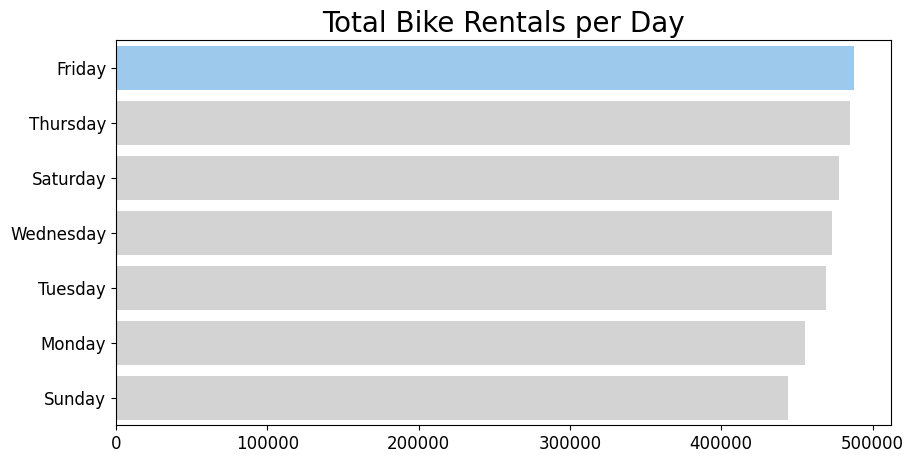

In [42]:
daily_most_users = day_df.groupby(by="weekday").agg({
    "count": "sum"
}).reset_index().sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=daily_most_users,
    x='count',
    y='weekday',
    palette=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
)
plt.title("Total Bike Rentals per Day", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### 2. Pada bulan apa peminjaman terbanyak dan terendah terjadi untuk semua dan masing - masing jenis pengguna?

<ipython-input-43-0ba870c31d4e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

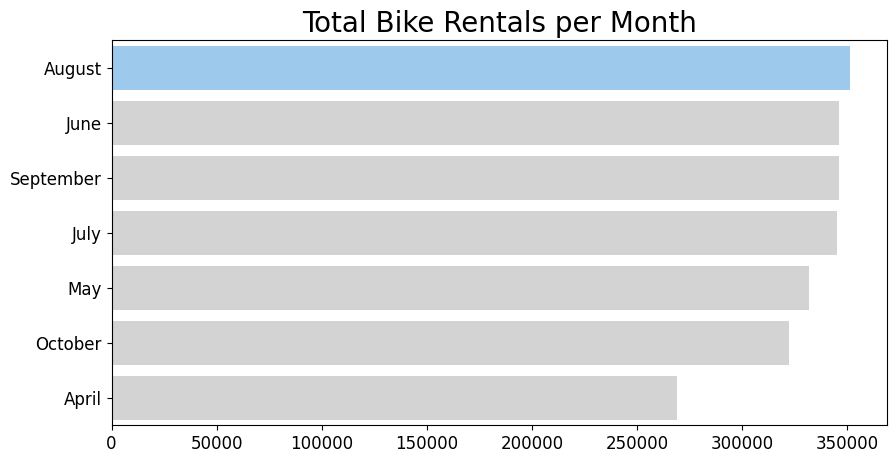

In [43]:
monthly_most_users = day_df.groupby(by="month").agg({
    "count": "sum"
}).reset_index().sort_values(by="count", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    x="count",
    y="month",
    data=monthly_most_users.head(7),
    palette=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
)
plt.title("Total Bike Rentals per Month", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### 3. Bagaimana tren peminjaman sepeda dari tahun ke tahun? Apakah ada peningkatan atau penurunan jumlah penyewaan?

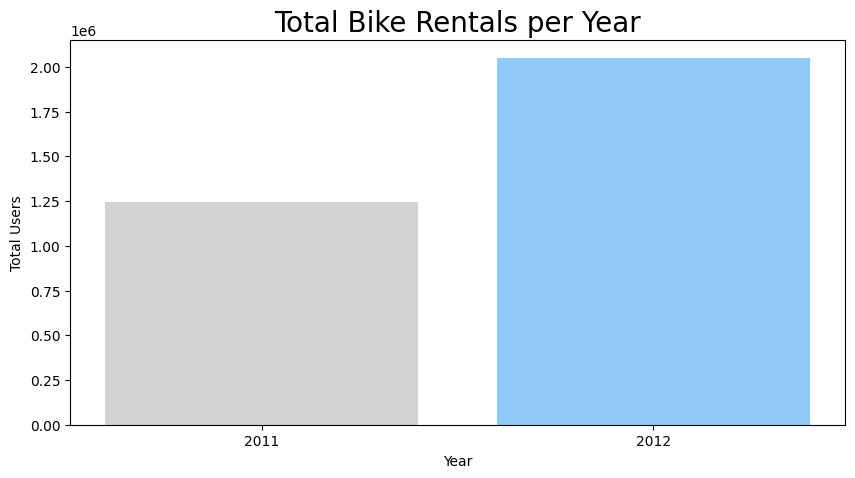

In [44]:
yearly_most_users = day_df.groupby(by="year").agg({
    "count": "sum"
}).reset_index()

plt.figure(figsize=(10, 5))
plt.bar(yearly_most_users['year'], yearly_most_users['count'], color=["#D3D3D3", "#90CAF9"])
plt.title("Total Bike Rentals per Year", loc="center", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Total Users")
plt.show()

### 4. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

<ipython-input-45-1512293598c1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-45-1512293598c1>:6: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/

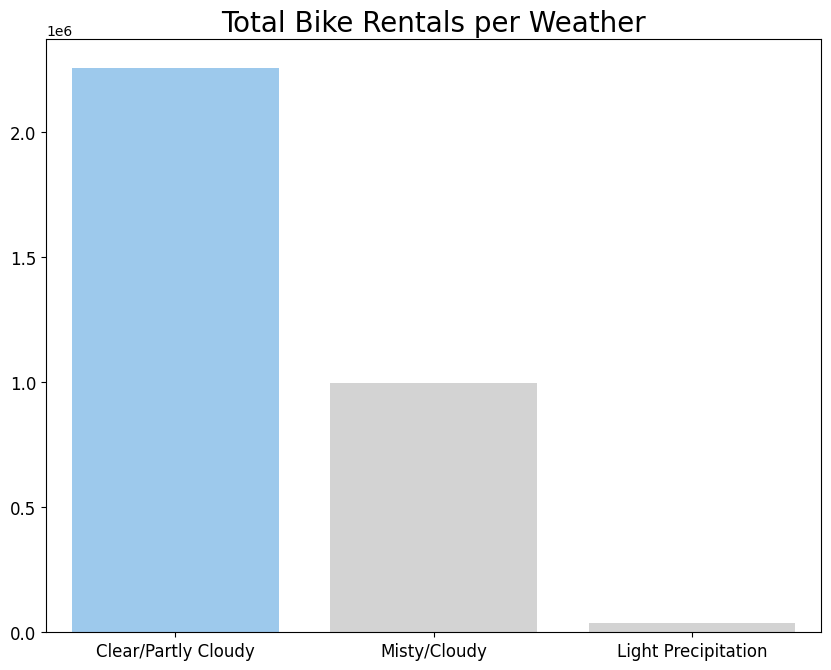

In [45]:
weather_most_users = day_df.groupby(by="weathersit").agg({
    "count": "sum"
}).reset_index().sort_values(by="count", ascending=False)

plt.figure(figsize=(10,7.7))
sns.barplot(
    y="count",
    x="weathersit",
    data=weather_most_users,
    palette=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
)
plt.title("Total Bike Rentals per Weather", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### 5. Musim apa yang paling mempengaruhi jumlah peminjaman sepeda (terbanyak dan terendah)?

<ipython-input-46-7e8efe65190a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-46-7e8efe65190a>:6: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/

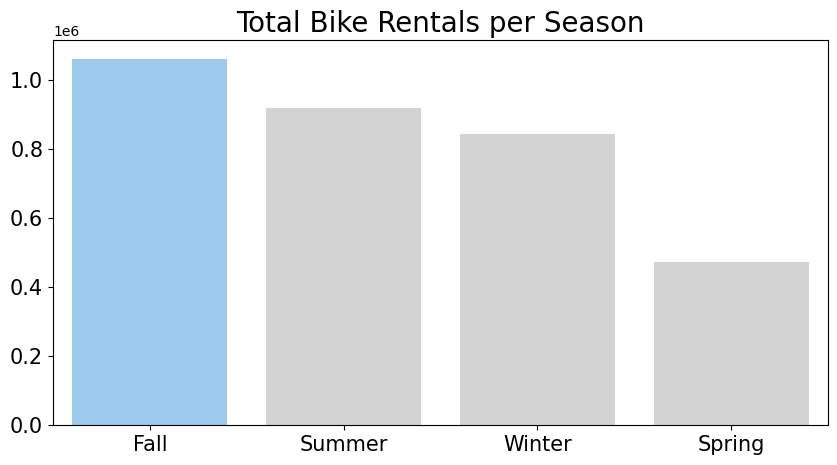

In [46]:
season_most_users = day_df.groupby(by="season").agg({
    "count": "sum"
}).reset_index().sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    y="count",
    x="season",
    data=season_most_users,
    palette=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
)
plt.title("Total Bike Rentals per Season", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.show()

### 6. Bagaimana variabel suhu, kelembapan, dan kecepatan angin mempengaruhi jumlah penyewaan sepeda?

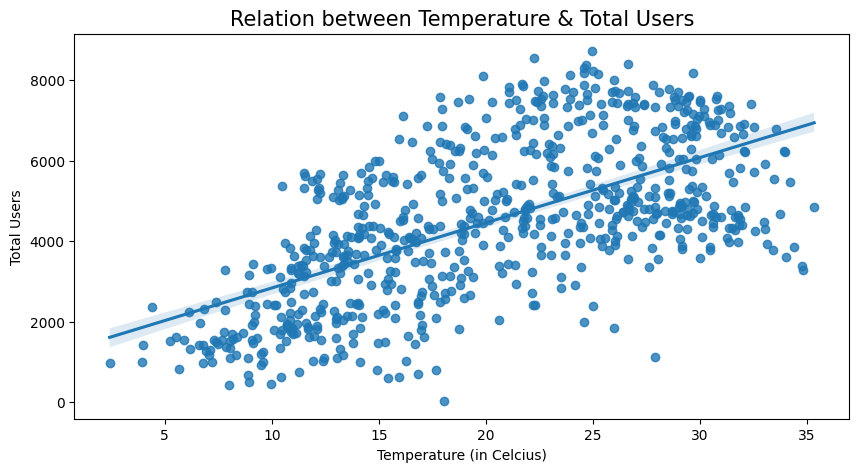

In [47]:
plt.figure(figsize=(10, 5))
sns.regplot(x="temp", y="count", data=day_df)
plt.title("Relation between Temperature & Total Users", loc="center", fontsize=15)
plt.xlabel("Temperature (in Celcius)")
plt.ylabel("Total Users")
plt.show()

**Insights:**
- Visualisasi dari analisis korelasi di atas menunjukkan hubungan positif yang cukup jelas antara suhu dengan jumlah penyewaan sepeda. Ketika suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat. Hal ini menunjukkan bahwa lebih banyak orang menyewa sepeda pada saat suhu lebih hangat.

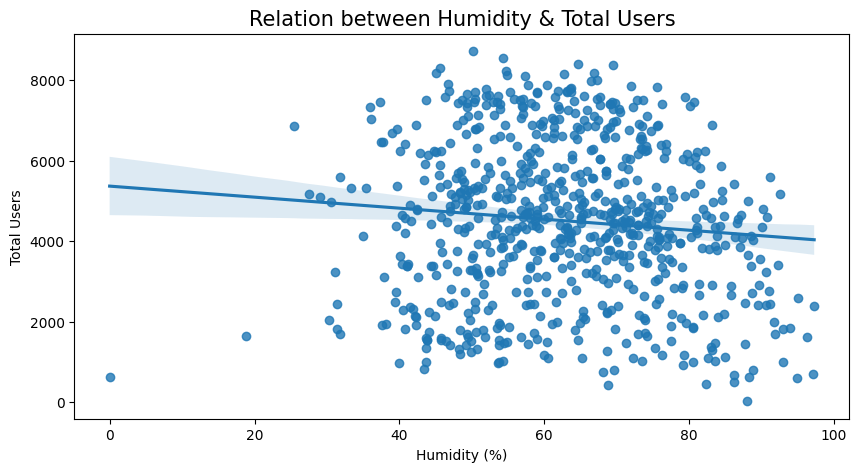

In [48]:
plt.figure(figsize=(10, 5))
sns.regplot(x="humidity", y="count", data=day_df)
plt.title("Relation between Humidity & Total Users", loc="center", fontsize=15)
plt.xlabel("Humidity (%)")
plt.ylabel("Total Users")
plt.show()

**Insights:**
- Berdasarkan visualisasi di atas, menunjukkan hubungan negatif yang sangat lemah antara kelembapan dengan jumlah penyewaan sepeda. Semakin tinggi kelembapan, jumlah penyewaan sepeda sedikit menurun, meskipun tidak signifikan. Ini mengindikasikan bahwa kelembapan mungkin bukan faktor yang sangat mempengaruhi keputusan pengguna untuk menyewa sepeda.

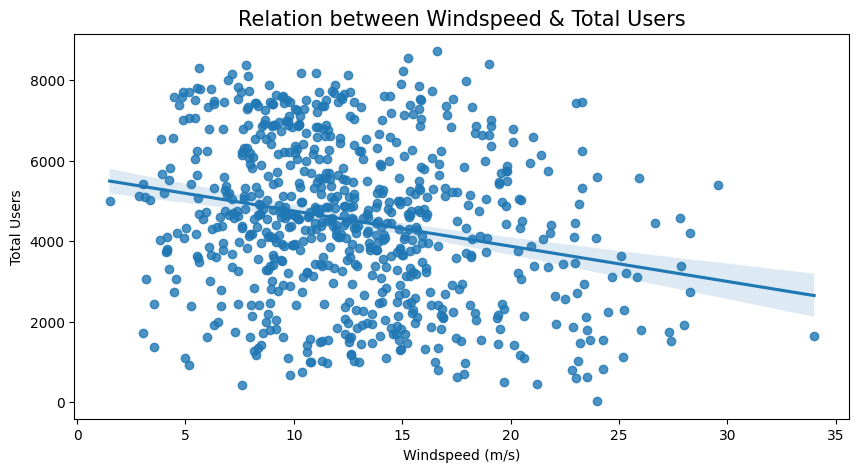

In [49]:
plt.figure(figsize=(10, 5))
sns.regplot(x="windspeed", y="count", data=day_df)
plt.title("Relation between Windspeed & Total Users", loc="center", fontsize=15)
plt.xlabel("Windspeed (m/s)")
plt.ylabel("Total Users")
plt.show()

**Insights:**
- Dari analisis korelasi yang tersaji dalam visualisasi di atas, menunjukkan adanya korelasi negatif yang lebih jelas antara kecepatan angin dan jumlah penyewaan sepeda. Semakin tinggi kecepatan angin, jumlah penyewaan sepeda cenderung menurun.

### 7. Bagaimana performa peminjaman sepeda setiap jam pada hari tertentu dengan kondisi cuaca tertentu (seperti cuaca, musim, atau hari libur/bukan)?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

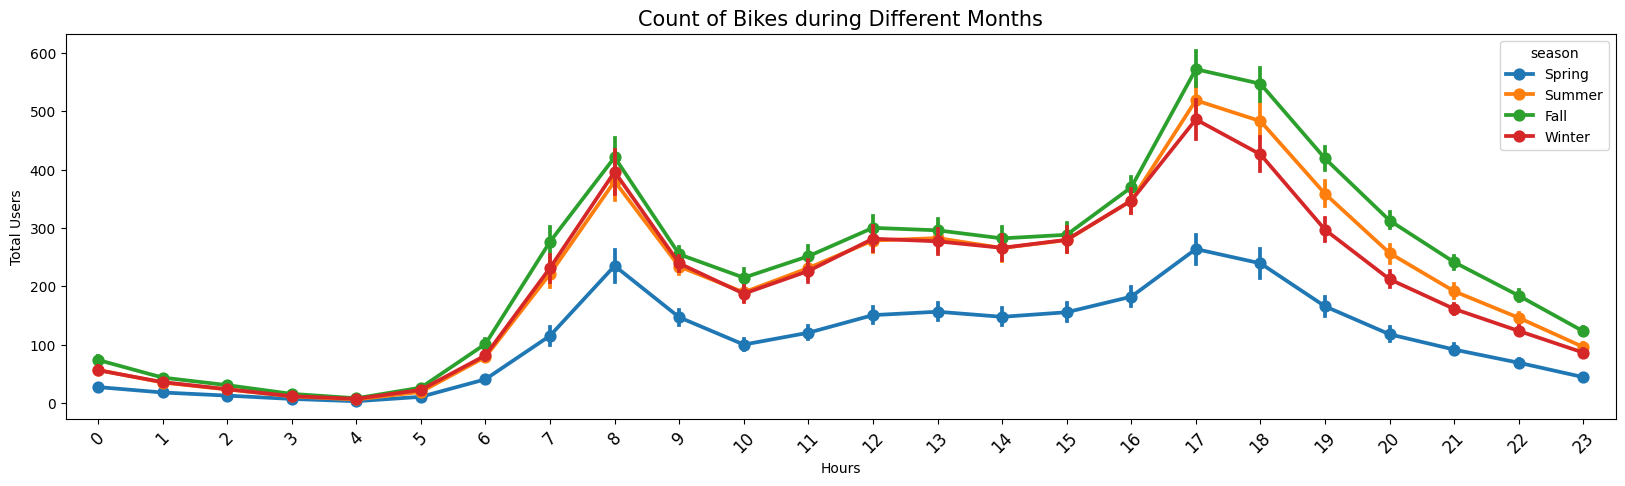

In [50]:
plt.figure(figsize=(20, 5))
sns.pointplot(data=hour_df, x='hour', y='count', hue='season')
plt.xticks(rotation=45)
plt.title("Count of Bikes during Different Months", loc="center", fontsize=15)
plt.xlabel("Hours")
plt.ylabel("Total Users")
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insights:**
- Berdasarkan pada visualisasi tren penyewaan di atas, pada musim gugur terjadi peningkatan penyewaan pada jam - jam sibuk (pagi pukul 8 dan sore pukul 17) dibandingkan dengan musim - musim lain.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

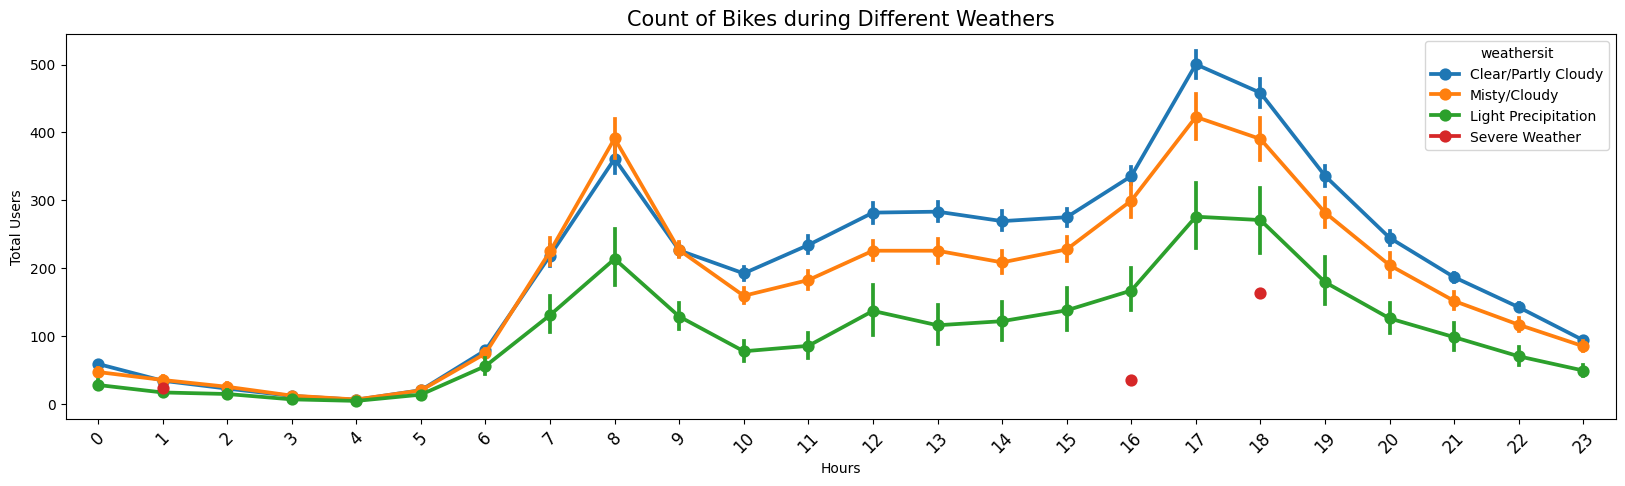

In [51]:
plt.figure(figsize=(20, 5))
sns.pointplot(data=hour_df, x='hour', y='count', hue='weathersit')
plt.xticks(rotation=45)
plt.title("Count of Bikes during Different Weathers", loc="center", fontsize=15)
plt.xlabel("Hours")
plt.ylabel("Total Users")
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insights:**
- Visualisasi berdasarkan kondisi cuaca akan menunjukkan bahwa cuaca *Clear/Partly Cloudy* lebih menguntungkan untuk penyewaan sepeda dibandingkan cuaca lainnya.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

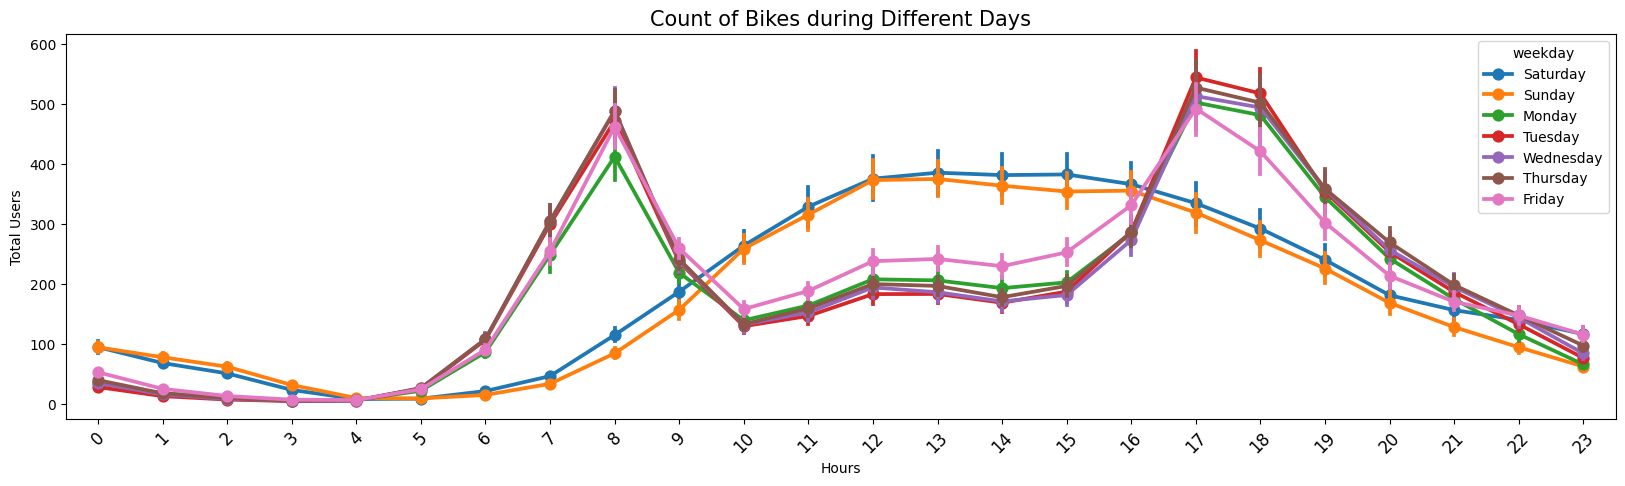

In [52]:
plt.figure(figsize=(20, 5))
sns.pointplot(data=hour_df, x='hour', y='count', hue='weekday')
plt.xticks(rotation=45)
plt.title("Count of Bikes during Different Days", loc="center", fontsize=15)
plt.xlabel("Hours")
plt.ylabel("Total Users")
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insights:**
- Grafik visualisasi tren di atas memperlihatkan pola penyewaan yang berbeda antara hari kerja dan akhir pekan, dengan adanya peningkatan penyewaan pada pukul 10 - 14 di akhir pekan. Sementara pada hari kerja terjadi peningkatan pada saat jam - jam sibuk pada pukul 8 dan 17.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

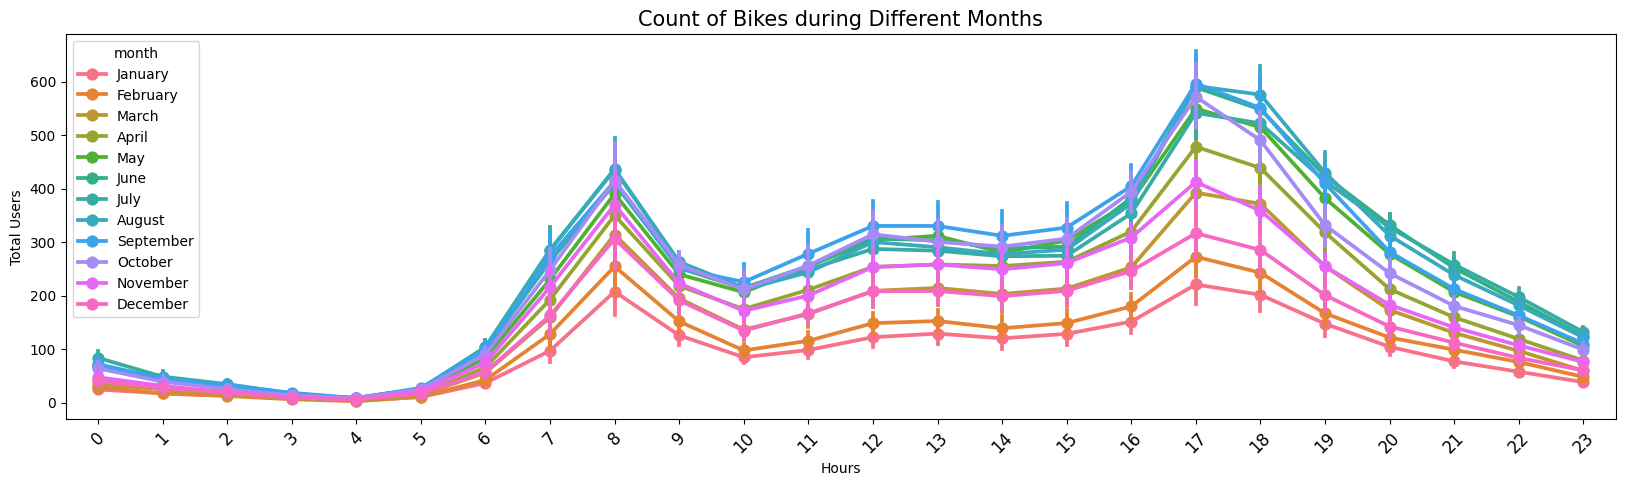

In [53]:
plt.figure(figsize=(20, 5))
sns.pointplot(data=hour_df, x='hour', y='count', hue='month')
plt.xticks(rotation=45)
plt.title("Count of Bikes during Different Months", loc="center", fontsize=15)
plt.xlabel("Hours")
plt.ylabel("Total Users")
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insights:**
- Dari analisis korelasi yang tersaji dalam visualisasi di atas, dapat dimengerti bahwa tren penyewaan sepeda berdasarkan bulan yang memperlihatkan pola musiman. Seperti pada bulan september memiliki peningkatan penyewaan sepeda pada pukul 10 hingga 17 yang mana lebih tinggi dari bulan lainnya dan pada pukul 18 hingga 23 terjadi penurunan yang lebih rendah dari bulan agustus.

## Analisis Lanjutan (Opsional)

Melakukan manual grouping terhadap variabel **windspeed** untuk mengelompokkan kategori kecepatan angin yang berdampak terhadap penyewaan sepeda oleh pengguna dengan teknik binning.

### Teknik Binning

In [54]:
# Kategori: kecepatan angin rendah, sedang, tinggi
windspeed_bins = [0, 13, 29, 50]  # rentang kecepatan angin
windspeed_labels = ['Low Wind', 'Medium Wind', 'High Wind']
hour_df['windspeed_category'] = pd.cut(hour_df['windspeed'], bins=windspeed_bins, labels=windspeed_labels)

windspeed_grouping = hour_df.groupby('windspeed_category')['count'].sum().sort_values(ascending=False)

windspeed_grouping

<ipython-input-54-f00a748ddeb5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  windspeed_grouping = hour_df.groupby('windspeed_category')['count'].sum().sort_values(ascending=False)


,count
windspeed_category,
Low Wind,1454453
Medium Wind,1360768
High Wind,126128


<ipython-input-56-ea63c6c2c8a4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

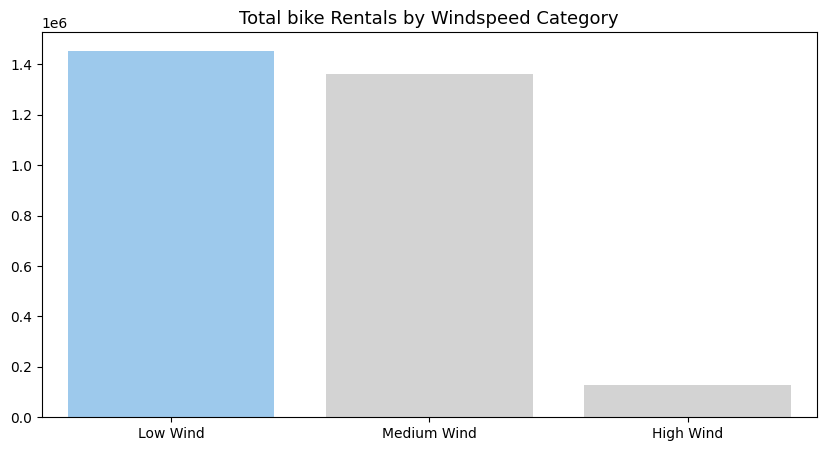

In [56]:
windspeed_most_users = windspeed_grouping.reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=windspeed_most_users,
    x='windspeed_category',
    y='count',
    palette=["#90CAF9", "#D3D3D3", "#D3D3D3"]
)
plt.title("Total bike Rentals by Windspeed Category", loc='center', fontsize=13)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

## Conclusion

- Conclusion mengenai dataset dapat diketahui bahwa hour.csv adalah versi yang lebih terperinci dari day.csv, karena di dalamnya terdapat informasi yang sama seperti pada dataset day.csv, tetapi dengan pemisahan per jam (menjelaskan day.csv secara lebih detail)
- Conclution pertanyaan 1: Terdapat perbedaan hari dengan jumlah terbanyak dan terendah dari penyewaan sepeda yang dilakukan oleh macam pengguna yang berbeda.
- Conclution pertanyaan 2: Menunjukkan perbedaan jumlah terbanyak dan terendah dari pengguna yang melakukan penyewaan sepeda pada bulan - bulan tertentu. Namun, bulan januari menjadi bulan dengan jumlah pengguna terendah untuk 2 jenis pengguna, yaitu *casual* dan *registered*.
- Conclution pertanyaan 3: Hasil analisis memberikan informasi adanya peningkatan yang signifikan pada penyewa sepeda dari tahun ke tahun pada setiap jenis pengguna.
- Conclution pertanyaan 4: Cuaca dengan kategori *Clear/Partly Cloudy* merupakan cuaca dengan jumlah penyewaan terbanyak yang dilakukan semua jenis pengguna yang mana menunjukkan bahwa pengguna lebih aktif melakukan penyewaan pada cuaca tersebut dan cuaca *Severe Weather* menjadi cuaca yang tidak terdapat penyewaan sama sekali yang dilakukan oleh pengguna.
- Conclution pertanyaan 5: Musim *gugur* menjadi musim dengan jumlah penyewaan terbanyak yang dilakukan oleh semua pengguna sedangkan musim *semi* mmerupakan musim dengan jumlah penyewaan terendah yang dilakukan oleh semua penggun.
- Conclution pertanyaan 6: Dari analisis diketahui bawha suhu memiliki relasi positif terhadap banyaknya jumlah penyewaan sepeda, sementara kelembaban serta kecepatan angin memiliki korelasi negatif terhadap banyaknya jumlah penyewaan sepeda. Sehingga dari korelasi tersebut dapat menjadi faktor yang mampu memengaruhi meningkat/menurunnya jumlah penyewaan sepeda.
- Conclution pertanyaan 7: Analisa performa dilakukan dengan menggunakan dataset **hour.csv** yang mana menunjukkan performa penyewaan sepeda pada setiap jam yang beragam yang mana dapat dianalisa lebih lanjut dengan melakukan filterisasi dengan variabel lain untuk mengetahui informasi lebih lanjut dari analisa yang dilakukan.
- Conclution pertanyaan 8: Pada analisa melalui manual grouping terhadap kecepatan angin, diketahui bahwa pengguna cenderung melakukan penyewaan pada saat kecepatan angin sedang rendah.

In [55]:
# Menyimpan dataset setelah proses analisis
day_df.to_csv('main_data2.csv', index=False)
hour_df.to_csv('main_data1.csv', index=False)